In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Reading the Data

df = pd.read_csv(r'E:\Python Project\movies.csv')

In [3]:
#Looking at the data
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
#Checking Data types
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
# Changing data type of budget and gross column

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
#Removign the released column
df.drop('released', axis = 1, inplace=True)

In [8]:
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
#Renaming year column to release year
df.rename(columns={'year':'release year'}, inplace=True)

In [10]:
#Dropping duplicate values
df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

In [11]:
#Sorting data based on gross
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,release year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,106,5.7,Jemma Dallender,21070,Neil Elman,2013
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,84,5.7,Will Friedle,5034,Andy Burg,1997


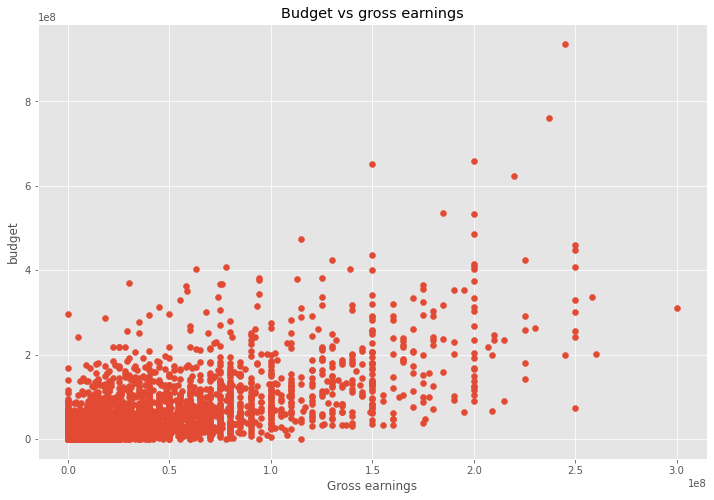

In [12]:
#Correlations
#Correlating budget and gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

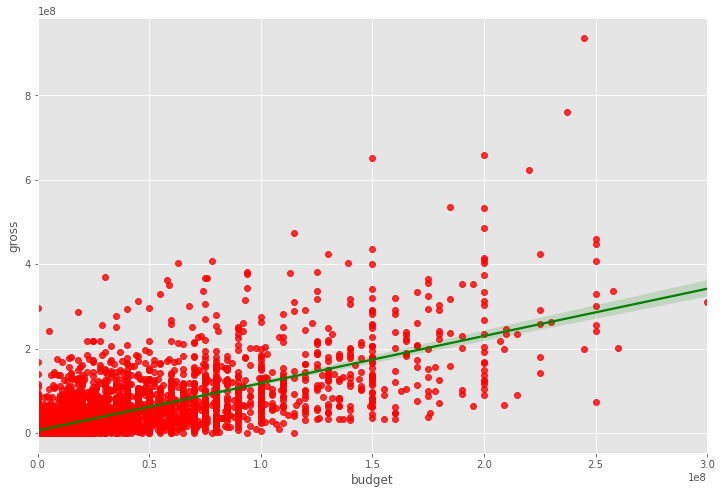

In [13]:
#Plotting the correlation using seaborn
sns.regplot(x='budget',y='gross', data=df,scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [14]:
#Plotting correlation matrix using pearson's method
df.corr(method='pearson')

,budget,gross,runtime,score,votes,release year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
release year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


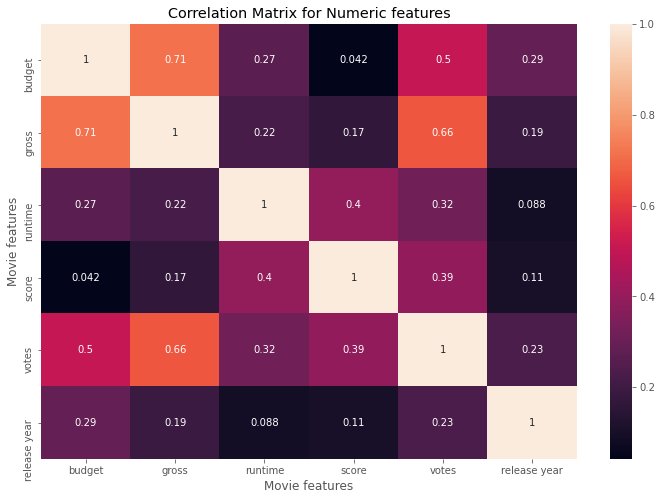

In [15]:
#Evidence: The matrix shows high correlation between budget and gross as mention earlier
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [18]:
#For further correlation we assign categorical data type to the columns with object data types
df_numerized  = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [28]:
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,release year
0,8000000,665,54,2192,1,52287414,4661,8,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,90,6.9,1139,36636,2549,1986


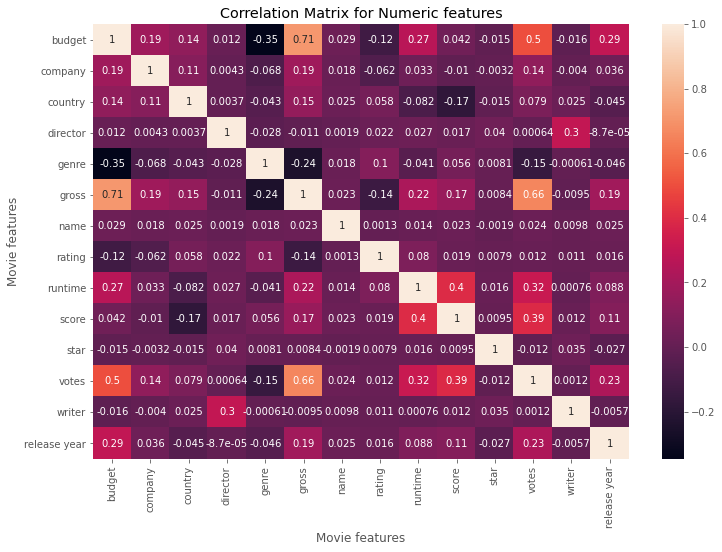

In [20]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [21]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
                                ...   
release year  score           0.105276
              star           -0.026682
              votes           0.229304
              writer         -0.005664
              release year    1.000000
Length: 196, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.346794
genre         budget         -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
writer        writer          1.000000
release year  release year    1.000000
Length: 196, dtype: float64

In [27]:
#Listing high coorelation features
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

budget        votes           0.503924
votes         budget          0.503924
              gross           0.662457
gross         votes           0.662457
budget        gross           0.712196
gross         budget          0.712196
budget        budget          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
writer        writer          1.000000
release year  release year    1.000000
dtype: float64

In [ ]:
#We can see that votes and budget have the highest correlation to the gross earnings